# **Embeddings:** Live Example from Scratch
In this notebook we will replicate the example provided in the powerpoint where embeddings were used to encode the neighborhoods of San Francisco. 

In order to be very ilustrative, we are going to use only one input - the neighborhood - with 4 different values: Tenderloin, Civic, Soma and F. District. As output we are going to have the hipothetical price of a house in each of those neighborhoods. 

### Imports
Let's start with all the imports that we will need in this project

In [0]:
# Import numpy here
import numpy as np

# Import a Keras sequential model here
from keras.models import Sequential

# Import the following Keras Layers: Embedding, Flatten, Dense
from keras.layers import Embedding, Flatten, Dense

### Inputs and Outputs
You are going to create both the input and output data! 

#### Input 
Please follow this rule:
1. Create a random list with 12 values containing the neighborhoods of our example. Here's an example:
```
neigborhoods = ['Tenderloin',
                'Civic',
                'Tenderloin',
                'Tenderloin',
                'Soma',
                ...
                ]
```

In [0]:
neigborhoods = ['Tenderloin',
             'Civic',
             'Tenderloin',
             'Tenderloin',
             'Soma',
             'Soma',
             'Soma',
             'Civic',
             'Civic',
             'F. District',
             'F. District',
             'F. District'
             ]

In [0]:
len(neigborhoods)

12

2. Declare a X variable with a numpy array where each neighborhood is encoded into one different integer. You can use either [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) from sklearn or the following dictionary. 
> **OBS:** For compatibility with Keras, the input shape of X should be (12, 1)! 

In [0]:
idx_to_neigh = {0: 'Tenderloin', 1: 'Soma', 2: 'Civic', 3: 'F. District'}
neigh_to_idx = {'Tenderloin':0 , 'Soma':1 , 'Civic':2 , 'F. District':3}

In [0]:
X = np.array([neigh_to_idx[n] for n in neigborhoods]).reshape(12,1); X

array([[0],
       [2],
       [0],
       [0],
       [1],
       [1],
       [1],
       [2],
       [2],
       [3],
       [3],
       [3]])

Done! Let's confirm that the input shape is (12, 1) as expected:

In [0]:
assert X.shape == (12,1)

### Output
For the output, lets create random prices using the following rule:
- If the neighborhood is either Tenderloin or Civic (cheap areas), assign a random price lower than 500 (the unit is kUSD). 
- If the neighborhood is either F. District or Soma (expensive areas), assign a random price higher than 500 (kUSD). 

> **OBS:** There's no need of creating an random algorithm. You can assign manually those prices! 
> **OBS2:** The shape of y should also be (12, 1)!

In [0]:
y = np.array([[400],
       [300],
       [430],
       [470],
       [590],
       [610],
       [710],
       [340],
       [410],
       [580],
       [800],
       [750]])

Let's confirm the output shape

In [0]:
assert y.shape == (12,1)

Let's now normalize the output for avoiding the selection of weird learning rates:

In [0]:
def normalize(y):
    return (y-y.mean())/y.std()

y = normalize(y)

In [0]:
y

array([[-0.83796867],
       [-1.47039785],
       [-0.64823991],
       [-0.39526824],
       [ 0.36364678],
       [ 0.49013262],
       [ 1.1225618 ],
       [-1.21742617],
       [-0.77472575],
       [ 0.30040386],
       [ 1.69174806],
       [ 1.37553347]])

### Define Model
Declare a Sequential Model with the following architecture:
- One Embedding Layer: `Embedding(4, 2, input_length=1)`
- One Flattening Operation: `Flatten`
- One Dense layer with 1 neuron as output: `Dense(1)`

In [0]:
model = Sequential([Embedding(4, 2, input_length=1),
                    Flatten(),
                    Dense(1)
                    
])

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1, 2)              8         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3         
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________


### Compile Model
Since this is a regression problem, make sure to select MSE as loss function. As optimizer, select Adam

In [0]:
model.compile(optimizer='adam', loss='mse')

### Fit Model
Since this is a very light model, fit it for 1000 epochs

In [0]:
model.fit(X, y, epochs=1000, )




Epoch 1/1000





12/12 [==============================] - 1s 42ms/step - loss: 0.9899
Epoch 2/1000
12/12 [==============================] - 0s 139us/step - loss: 0.9893
Epoch 3/1000
12/12 [==============================] - 0s 126us/step - loss: 0.9886
Epoch 4/1000
12/12 [==============================] - 0s 96us/step - loss: 0.9878
Epoch 5/1000
12/12 [==============================] - 0s 89us/step - loss: 0.9870
Epoch 6/1000
12/12 [==============================] - 0s 89us/step - loss: 0.9861
Epoch 7/1000
12/12 [==============================] - 0s 86us/step - loss: 0.9853
Epoch 8/1000
12/12 [==============================] - 0s 93us/step - loss: 0.9844
Epoch 9/1000
12/12 [==============================] - 0s 107us/step - loss: 0.9836
Epoch 10/1000
12/12 [==============================] - 0s 111us/step - loss: 0.9827
Epoch 11/1000
12/12 [==============================] - 0s 113us/step - loss: 0.9818
Epoch 12/1000
12/12 [==============================] - 0s 96us/step - loss: 0.9809


### Visualizing weights

In [0]:
idx_to_neigh = {0: 'Tenderloin', 1: 'Soma', 2: 'Civic', 3: 'F. District'}

In [0]:
model.layers[0].get_weights()[0]

array([[ 0.39984998, -0.31723857],
       [-0.36673504,  0.33516884],
       [ 0.64898163, -0.6414774 ],
       [-0.59376293,  0.6124335 ]], dtype=float32)

In [0]:
e_weights = model.layers[0].get_weights()[0]; e_weights

array([[ 0.39984998, -0.31723857],
       [-0.36673504,  0.33516884],
       [ 0.64898163, -0.6414774 ],
       [-0.59376293,  0.6124335 ]], dtype=float32)

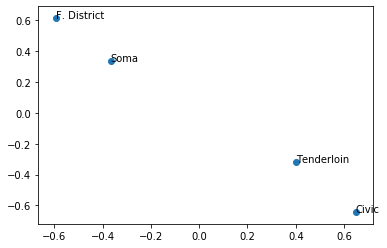

In [0]:
import matplotlib.pyplot as plt

plt.scatter(e_weights[:, 0], e_weights[:, 1])
for i, coord in enumerate(e_weights):
    plt.text(coord[0], coord[1]+0., idx_to_neigh[i])